In [176]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [177]:
#Loading the dataset
data = pd.read_csv('Datasets/bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [178]:
data.shape

(11162, 17)

In [179]:
data.info

<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campa

In [180]:
df = data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [181]:
df['job']=df['job'].str.replace('.','',regex=False)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [182]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [184]:
for col in df.select_dtypes(include=object).columns:
    print(df[col].unique())

['admin' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'other' 'failure' 'success']
['yes' 'no']


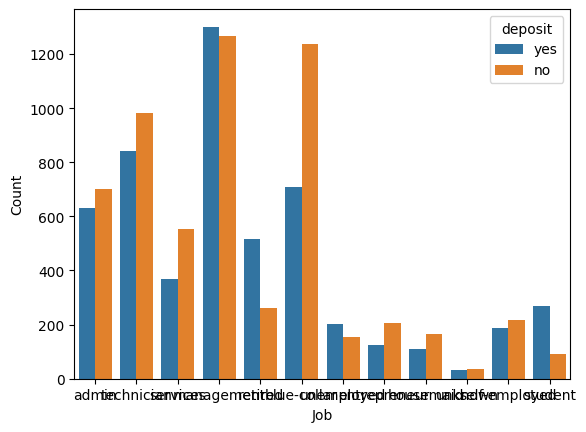

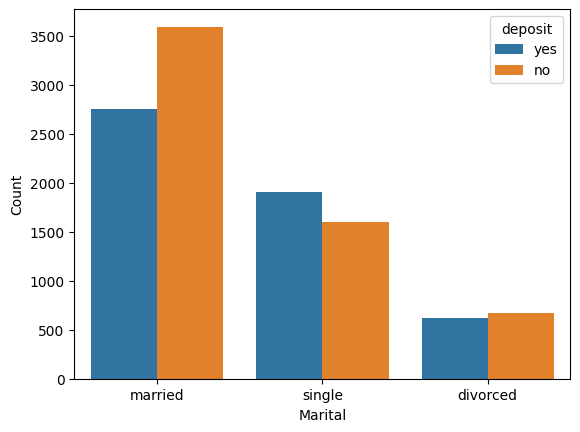

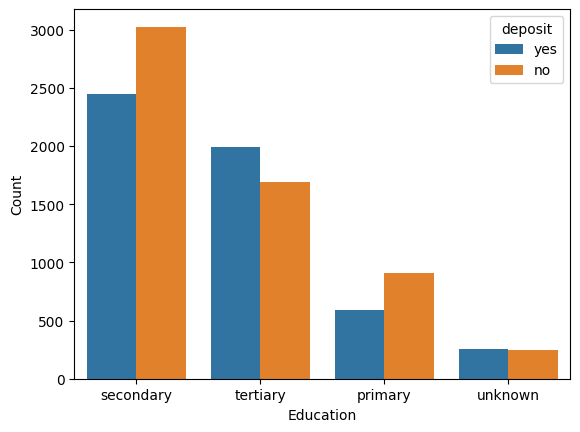

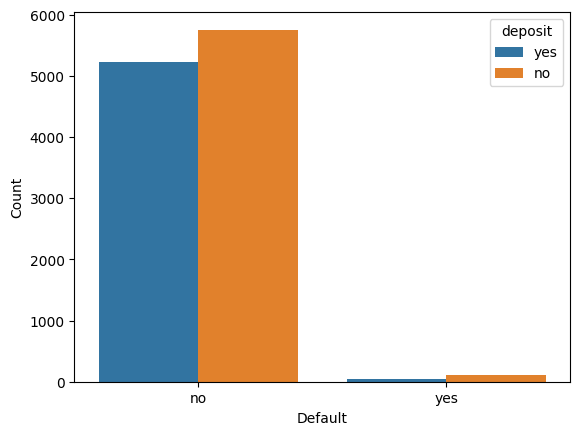

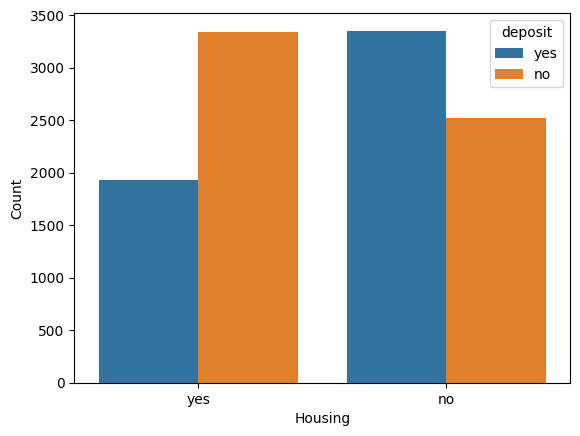

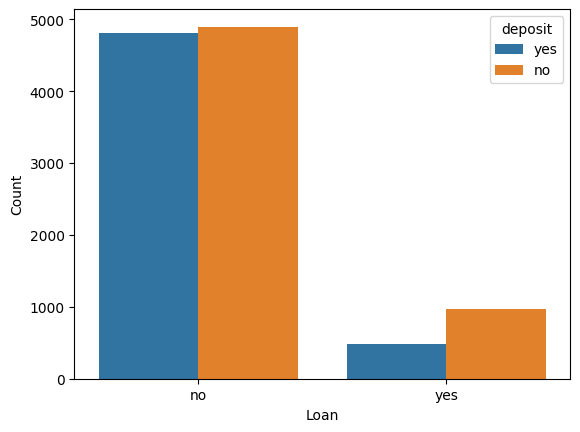

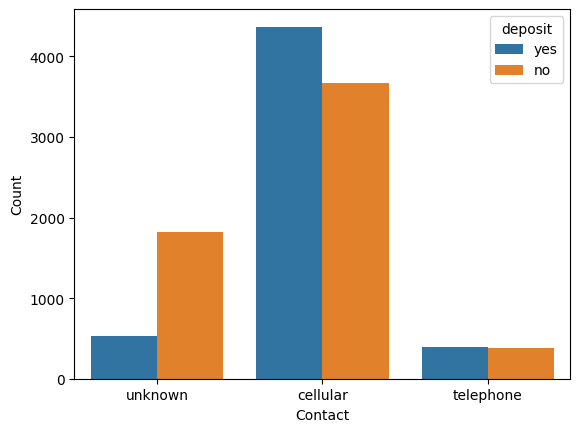

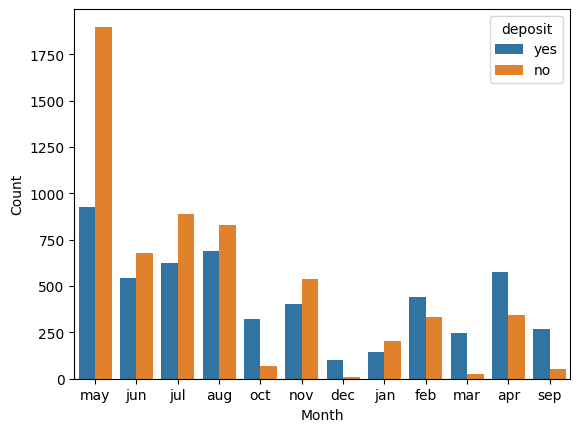

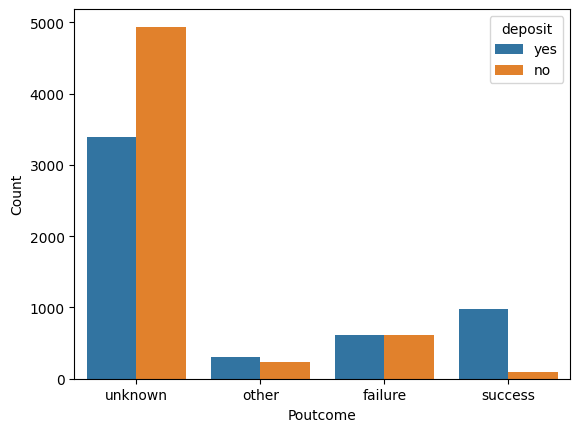

In [185]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']

for col in categorical_cols:
    plt.Figure()
    sns.countplot(data=df,x=col, hue='deposit')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()


In [186]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [187]:
df['deposit'].apply(lambda x: (x, type(x))).unique()


array([('yes', <class 'str'>), ('no', <class 'str'>)], dtype=object)

In [188]:
df['deposit'] = df['deposit'].astype(str).str.strip().str.lower()
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})



In [189]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [190]:
df['deposit'].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [191]:
deposit_per = df['deposit'].value_counts(normalize=True)*100
deposit_per

deposit
0    52.616019
1    47.383981
Name: proportion, dtype: float64

In [192]:
deposit_counts =df['deposit'].value_counts()
majority_class = deposit_counts.max()
minority_class = deposit_counts.min()

balance_ratio = minority_class/majority_class

if balance_ratio>0.5:
    print("The class is balanced!...")
else:
    print("The class is imbalanced...")

The class is balanced!...


In [193]:
#Scaling numerical
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1.930226,-0.554168,-0.481184,-0.36326,unknown,1.053764
1,1.239676,admin,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,3.154612,-0.554168,-0.481184,-0.36326,unknown,1.053764
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,2.929901,-0.554168,-0.481184,-0.36326,unknown,1.053764
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,0.596366,-0.554168,-0.481184,-0.36326,unknown,1.053764
4,1.071790,admin,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,0.867171,-0.186785,-0.481184,-0.36326,unknown,1.053764


Encoding Categorical variables

In [194]:
from sklearn.preprocessing import LabelEncoder
#Binary Columns
binary_cols = ['default','housing','loan']

le = LabelEncoder()

for col in binary_cols:
    df[col]=le.fit_transform(df[col])

df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin,married,secondary,0,0.252525,1,0,unknown,-1.265746,may,1.930226,-0.554168,-0.481184,-0.36326,unknown,1.053764
1,1.239676,admin,married,secondary,0,-0.459974,0,0,unknown,-1.265746,may,3.154612,-0.554168,-0.481184,-0.36326,unknown,1.053764
2,-0.019470,technician,married,secondary,0,-0.080160,1,0,unknown,-1.265746,may,2.929901,-0.554168,-0.481184,-0.36326,unknown,1.053764
3,1.155733,services,married,secondary,0,0.293762,1,0,unknown,-1.265746,may,0.596366,-0.554168,-0.481184,-0.36326,unknown,1.053764
4,1.071790,admin,married,tertiary,0,-0.416876,0,0,unknown,-1.265746,may,0.867171,-0.186785,-0.481184,-0.36326,unknown,1.053764


In [195]:
# List of nominal columns
nominal_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# One-hot encode using pandas
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,...,0,0,0,1,0,0,0,0,0,1
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,...,0,0,0,1,0,0,0,0,0,1
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,...,0,0,0,1,0,0,0,0,0,1
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,...,0,0,0,1,0,0,0,0,0,1
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,...,0,0,0,1,0,0,0,0,0,1


Train test Split

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [205]:
X = df.drop('deposit',axis=1)
y = df['deposit']

X = X.astype(int)
y = y.astype(int)



In [206]:
y.dtype

dtype('int64')

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [211]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is : ")
print(accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy is : 
0.7756381549484997
Confusion Matrix:
[[1023  143]
 [ 358  709]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      1166
           1       0.83      0.66      0.74      1067

    accuracy                           0.78      2233
   macro avg       0.79      0.77      0.77      2233
weighted avg       0.78      0.78      0.77      2233



<Axes: >

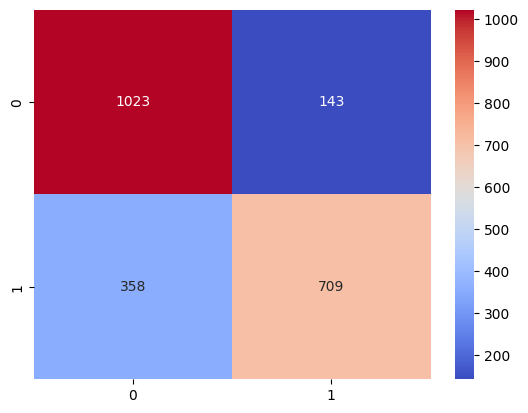

In [215]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')

Using Decision Trees

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, dt_y_pred)
print("Accuracy is : ")
print(accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

print("\nClassification Report:")
print(classification_report(y_test, dt_y_pred))

Accuracy is : 
0.7317510076130765
Confusion Matrix:
[[928 238]
 [361 706]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1166
           1       0.75      0.66      0.70      1067

    accuracy                           0.73      2233
   macro avg       0.73      0.73      0.73      2233
weighted avg       0.73      0.73      0.73      2233



0.7823555754590238
The confusion Matrix is: 
[[957 209]
 [277 790]]


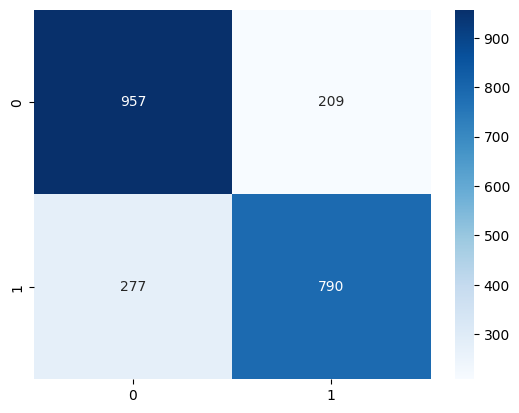

In [225]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test,rf_y_pred)
print(accuracy)

print('The confusion Matrix is: ')
con_mat = confusion_matrix(y_test, rf_y_pred)
print(con_mat)

sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.show()